

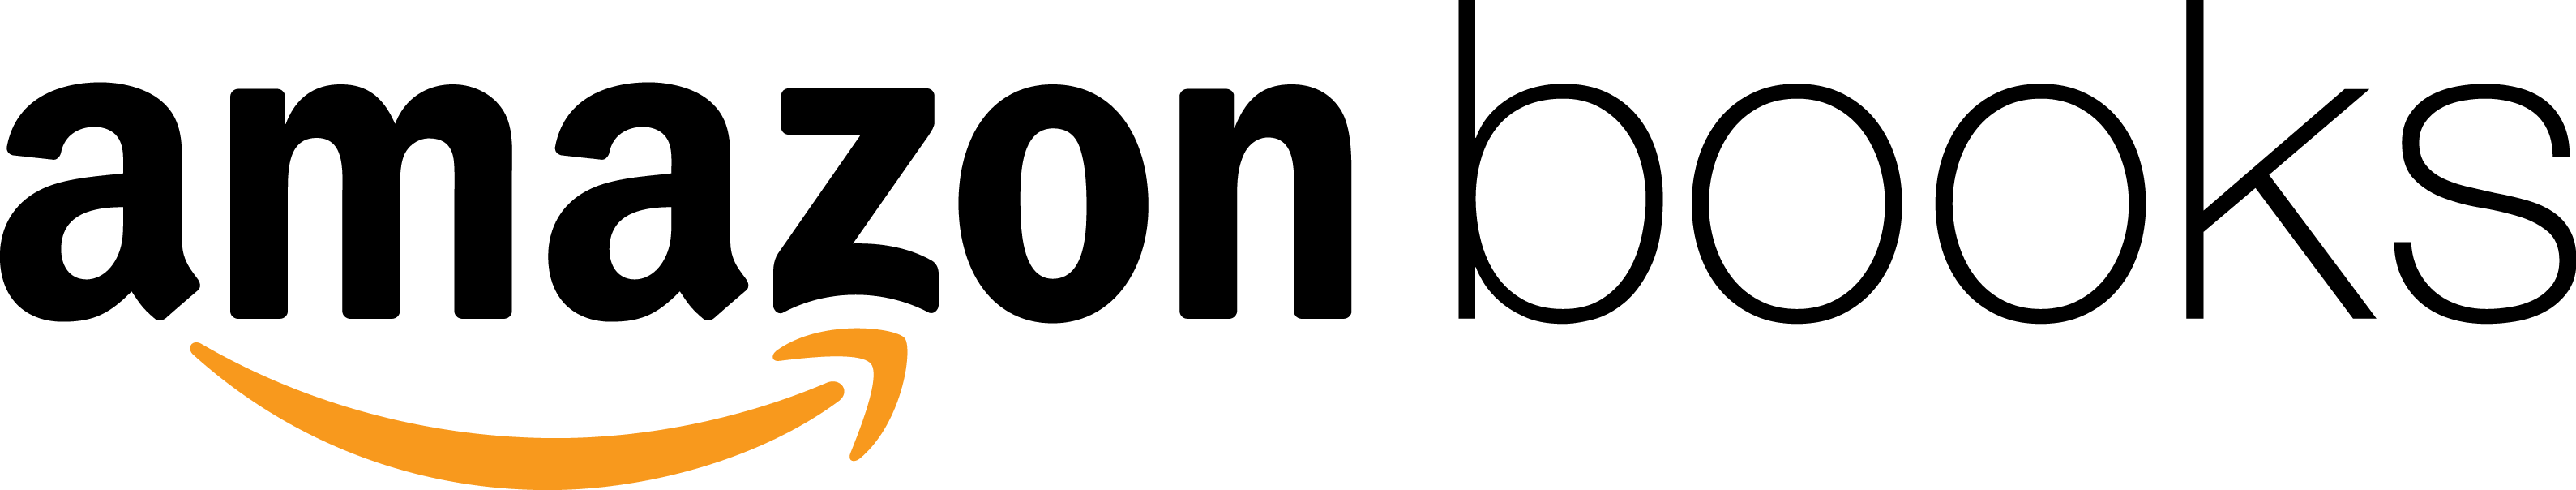

### In this notebook I will explore the 50-beselling-books from Amazon from a visualization point of view. I will make a EDA first and then use some plotly features to create nice data interactive visualiation. Code ready for your personal projects!!!

Each code cell is commented to better understand the intructions. Enjoy :)

In [ ]:
# Always the same :) 
import numpy as np 
import pandas as pd 

#Basic Matplotlib Visualizations 

import matplotlib.pyplot as plt
from itertools import cycle

# Interactive Data Visualizations toolkit 
import plotly.express as px
import plotly.graph_objects as go



## EDA Analysis and Basic Visualizations

In this brief section I will study the dataset given, what features are available, the duplicates and some basic plots in matplotlib. 

In [ ]:
data=pd.read_csv('/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')

The dataset describes the best 50 selling books in the Amazon book shop between 2009 and 2019. The features available are:

* Name: the title of the book
* Author:
* Reviews: the number of reviews about that book
* Price:
* Year:
* Genre: distinction between 'Fiction' and 'Non Fiction' genre 

Firstly I select the duplicates by 'Name' because I don't want multiple rows about the same book. Duplicates among the others features are fine, because I can find different books written by the same Author. 

In [ ]:
#Print the dataframe of the duplicates by Name
data[data.duplicated(subset=['Name'])]

In [ ]:
#Delete from the dataset the duplicates selected above
data=data.drop_duplicates('Name')
print('After the elimination of the duplicates I have {} books'.format(len(data)))
data.describe()

In [ ]:
features=['User Rating','Reviews','Price','Year']

### Visualization in Matplotlib

In this section I will use some matplotlib functions to plot usef information about the dataset. 

In [ ]:
colors = ['navy', 'turquoise', 'darkorange', 'cornflowerblue','gold','fuchsia','slateblue','teal']

fig,ax= plt.subplots(1,4,figsize=(20,6))

for i in range(len(features)):
    ax[i].hist(data[features[i]], color=colors[i],alpha=0.8)
    ax[i].set_title(label=str(features[i])+' distribution')
    ax[i].set_xlabel(str(features[i]))
    ax[i].set_ylabel('Value')
    ax[i].grid()
    

In [ ]:
fig,ax= plt.subplots(1,2,figsize=(20,6))

rat_list=list(set(data['User Rating']))
proportion=data.groupby('User Rating').size()
ratings=[]
lab=[]
for rating in rat_list:
    if proportion[rating]/len(data)>=0.05:
        lab.append(str(rating))
        ratings.append(proportion[rating]/len(data))
        
ratings.append(1-sum(ratings))
lab.append('Others')
        
ax[0].pie(ratings,  labels=lab,autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
ax[0].axis('equal')
fig.suptitle('Proportion of the User Ratings')


ax[1].bar(lab,ratings,width=0.5,color='turquoise')
ax[1].grid()


## Visualizations with plotly

In this section will be used the plotply to visualize some fancy and interactive plots.
In the first is possible to plot some features divided by author while in the second the differences between the two genres. For example it is possible to plot the Prices of the books divided by Genre (Fiction vs Non-Fiction) and visualize the distributions. I used the boxplot with violins overplotted, it is possible to visualize the main parameters of the distribution like the mean and the median going on the plot with the cursor. 

In [ ]:
# You can use this command to make the plot interactive and make the graph in running mode, I will choose one particular feature

# print('Authors: {}'.format(data['Author']))
# print('Choose one Author: ')
# plot_this_author=input("Author: ")
# print ("Avaiable Variables:")
# print(*features)

plot_this_author='Jeff Kinney'

#plot_this_feature = input("Select one of the variables: ")

plot_this_feature ='Price'

fig = go.Figure()

fig.add_trace(go.Violin(x=data['Author'][data['Author'] == plot_this_author],
                        y=data[plot_this_feature][data['Author'] == plot_this_author],
                        name=plot_this_author,
                        box_visible=True,
                        meanline_visible=True, x0="0 - Good"))


fig.update_traces(meanline_visible=True,
                  points='all') # show all points

fig.update_layout(
    title='Violin Plot of the Feature:  ' + plot_this_feature,
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Value',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0.40,
        y = 0.95,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)',
    )
)

fig.show()

In [ ]:
#feat=input('Variable to plot: ')

feat='Price'

fig = go.Figure()

fig.add_trace(go.Violin(x=data['Genre'][data['Genre'] == 'Fiction'],
                        y=data[feat][data['Genre']=='Fiction'],
                        name='Fiction Books',
                        box_visible=True,
                        meanline_visible=True, x0="0 - Good"))

fig.add_trace(go.Violin(x=data['Genre'][data['Genre'] == 'Non Fiction'],
                        y=data[feat][data['Genre']=='Non Fiction'],
                        name='Non Fiction Books',
                        box_visible=True,
                        meanline_visible=True, x0="0 - Good"))


fig.update_traces(meanline_visible=True,
                  points='all') # show all points

fig.update_layout(
    title='Violin Plot of the Feature:  ' + feat,
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Value',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0.40,
        y = 0.95,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)',
    )
)

fig.show()

It is also possible to use another great library from plotply, plotly.express. I used it to visualize a scatterplot where I compare different features from the dataset.
The data are divided by Genre, on the x axes is plotted the Price of the book while on the y axes the User Ratings. The size of the marker dipends by the number of Reviews of that particular book. 

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(data, x="Price", y="User Rating", color="Genre",
                 size='Reviews')

fig.update_layout(
    title='Correlations among the features:',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Value',
        titlefont_size=16,
        tickfont_size=14,
    ),
)

fig.show()

In [ ]:
years=list(data['Year'].drop_duplicates())
years=sorted(years)

mean_reviews=[]
mean_ratings=[]
fiction_genre=[]
non_fiction_genre=[]
mean_price=[]
for year in years:
    mean_price.append(data[data['Year']==year]['Price'].mean())
    mean_ratings.append(data[data['Year']==year]['User Rating'].mean())
    fiction_genre.append(len(data[(data['Year']==year)&(data['Genre']=='Fiction')]))
    non_fiction_genre.append(len(data[(data['Year']==year)&(data['Genre']=='Non Fiction')]))
    mean_reviews.append(data[data['Year']==year]['Reviews'].mean()/1000)

In [ ]:
fig=go.Figure()

fig.add_trace( go.Scatter(x=years, y=mean_price, name='Mean price'))
fig.add_trace( go.Scatter(x=years, y=mean_ratings, name='Mean rating'))
fig.add_trace( go.Scatter(x=years, y=mean_reviews,name= 'Mean number reviews (k)'))
fig.add_trace( go.Scatter(x=years, y=fiction_genre, name='Mean number Fiction books'))
fig.add_trace( go.Scatter(x=years, y=non_fiction_genre,name='Mean number Non Fiction books'))


fig.update_layout(
    title='Features during the years:',
    xaxis=dict(title='Year'),
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Value',
        titlefont_size=16,
        tickfont_size=14,
    ),
)

fig.show()

I hope you enjoyed this fast reference to make some interactive plots, this can really make the data more readable and interpretable instead of static plots. I leave some refernces as follow:

- https://plotly.com/python/line-charts/
- https://plotly.com/python/violin/